In [ ]:
%matplotlib inline

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
seq1="AGTTCATA"
seq2="ATCGTCTA"
match=1
mismatch=-1
gap=-2

In [60]:
def need_wunsch(seq1,seq2,match, mismatch, gap):
    seq1=list(seq1)
    seq2=list(seq2)
    matrix= np.full((len(seq2)+2,len(seq1)+2),' ', dtype=object)
    matrix[0,2:]=seq1
    matrix[1,1:]=list(range(0,-len(seq1)*abs(gap) -1,gap))
    matrix[2:,0]=seq2
    matrix[1:,1]=list(range(0,-len(seq2)*abs(gap) -1,gap))
    match={True: match, False: mismatch}
    for j in range(2,len(seq1)+2):
        for i in range(2,len(seq2)+2):
            diagonal=matrix[i-1][j-1]+match[seq1[j-2]==seq2[i-2]]
            izquierda=matrix[i-1][j]+gap
            arriba=matrix[i][j-1]+gap
            matrix[i,j]=max(diagonal,izquierda,arriba)
    df=pd.DataFrame(matrix)
    return df


In [61]:
matrix=need_wunsch(seq1,seq2,match,mismatch,gap)
matrix



,0,1,2,3,4,5,6,7,8,9
0,,,A,G,T,T,C,A,T,A
1,,0,-2,-4,-6,-8,-10,-12,-14,-16
2,A,-2,1,-1,-3,-5,-7,-9,-11,-13
3,T,-4,-1,0,0,-2,-4,-6,-8,-10
4,C,-6,-3,-2,-1,-1,-1,-3,-5,-7
5,G,-8,-5,-2,-3,-2,-2,-2,-4,-6
6,T,-10,-7,-4,-1,-2,-3,-3,-1,-3
7,C,-12,-9,-6,-3,-2,-1,-3,-3,-2
8,T,-14,-11,-8,-5,-2,-3,-2,-2,-4
9,A,-16,-13,-10,-7,-4,-3,-2,-3,-1


[[Text(0, 0.5, 'A'),
  Text(0, 1.5, 'T'),
  Text(0, 2.5, 'C'),
  Text(0, 3.5, 'G'),
  Text(0, 4.5, 'T'),
  Text(0, 5.5, 'C'),
  Text(0, 6.5, 'T'),
  Text(0, 7.5, 'A')]]

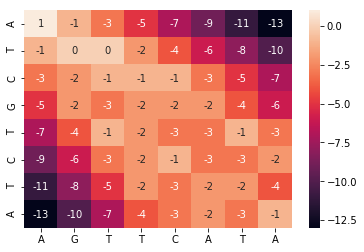

In [65]:
#plot,ax=plt.subplots()
g=sns.heatmap(matrix.iloc[2:,2:].astype(int),annot=True)
g.set(xticklabels=list(seq1))
g.set(yticklabels=list(seq2))
